Trabalhando com Planilhas do Excel

In [16]:
# importando a biblioteca
import pandas as pd

In [17]:
# Leitura dos arquivo
df1 = pd.read_excel("Aracaju.xlsx")
df2 = pd.read_excel("Fortaleza.xlsx")
df3 = pd.read_excel("Natal.xlsx")
df4 = pd.read_excel("Recife.xlsx")
df5 = pd.read_excel("Salvador.xlsx")

In [18]:
# Jutando todos os arquivos
df = pd.concat([df1,df2,df3,df4,df5])

In [19]:
# Exibindo as 5 primeiras linhas do  arquivo
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [20]:
# Exibindo as 5 ultimas linhas do  arquivo
df.tail()

,Cidade,Data,Vendas,LojaID,Qtde
235,Salvador,2019-01-03,41.84,1034,1
236,Salvador,2019-01-03,126.29,1035,3
237,Salvador,2019-01-03,38.06,1036,3
238,Salvador,2019-01-03,139.64,1035,1
239,Salvador,2019-01-03,161.41,1037,3


In [21]:
# para pega uma amostra aleatoria do conjunto de dados
# usamos o sample
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde
28,Aracaju,2018-01-01,114.93,1520,5
44,Fortaleza,2019-01-01,215.11,1003,1
94,Recife,2019-01-01,24.70,982,3
71,Fortaleza,2019-01-01,41.89,1004,4
119,Fortaleza,2019-03-02,152.30,982,7


In [22]:
# verificando o tipo de dados de cada coluna
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

In [23]:
# verificando total de linhas e colunas
df.shape

(894, 5)

In [24]:
# verificando as informações estatisticas dos dados
df.describe()

,Vendas,LojaID,Qtde
count,888.000000,894.000000,894.000000
mean,122.967005,1074.844519,3.261745
std,167.216440,191.360735,2.096964
min,3.010000,852.000000,1.000000
25%,22.380000,983.000000,2.000000
50%,44.160000,1035.000000,3.000000
75%,161.117500,1037.000000,4.000000
max,886.000000,1523.000000,10.000000


In [25]:
# Alterando o tipo de dados de cada coluna  LojaID
df["LojaID"] = df["LojaID"].astype("object")

In [26]:
# verificando o tipo de dados de cada coluna
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID            object
Qtde               int64
dtype: object

**Tratando os valors faltantes**

In [29]:
# Consultando as linhas com valores faltantes
# para isso vamos usar o isnull para verifica todos os faltantes e sum
# para fazer a soma
df.isnull().sum()

Cidade    0
Data      0
Vendas    6
LojaID    0
Qtde      0
dtype: int64

Opções para tratar valores faltantes

In [30]:
# Substitundo os valores nulos pela media
df['Vendas'] = df['Vendas'].fillna(df['Vendas'].mean())

In [31]:
# verificando de novo
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [32]:
# Substitundo os valores nulos por zero
# o fillna vai busca todos os valores nulo e substituir por 0
df['Vendas'] = df['Vendas'].fillna(0)

In [ ]:
# Apagando as linhas com valors nulos
df = df.dropna()

In [33]:
# Apagando as linhas com valors nulos com base apenas em 1 coluna
df = df.dropna(subset=['Vendas'])

In [34]:
# Removendo linhas que estejam com valores faltantes em todas as colunas
df = df.dropna(how="all")

Criando colunas novas

In [35]:
# criando a coluna de receita, vendas * Qtde
df['Receita'] = df['Vendas'].mul(df["Qtde"])


In [36]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita
0,Aracaju,2018-01-01,142.00,1520,1,142.00
1,Aracaju,2018-01-01,14.21,1522,6,85.26
2,Aracaju,2018-01-01,71.55,1520,1,71.55
3,Aracaju,2018-01-01,3.01,1521,7,21.07
4,Aracaju,2018-01-01,24.51,1522,8,196.08


In [37]:
# criando a coluna de receita por vendas, receita / vendas 
df["Receita/Vendas"] = df["Receita"] / df["Vendas"]

In [38]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
0,Aracaju,2018-01-01,142.00,1520,1,142.00,1.0
1,Aracaju,2018-01-01,14.21,1522,6,85.26,6.0
2,Aracaju,2018-01-01,71.55,1520,1,71.55,1.0
3,Aracaju,2018-01-01,3.01,1521,7,21.07,7.0
4,Aracaju,2018-01-01,24.51,1522,8,196.08,8.0


In [39]:
# Pegando a maior receita 
df["Receita"].max()

3544.0

In [40]:
# Peganado a menor receita 
df["Receita"].min()

3.34

In [41]:
# nlargest, top 3 com base na coluna receita
df.nlargest(3,"Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
7,Natal,2019-03-18,886.0,853,4,3544.0,4.0
51,Natal,2018-01-21,859.0,852,4,3436.0,4.0
55,Natal,2019-01-08,859.0,854,4,3436.0,4.0


In [43]:
# nsmallest, top 3 das menores receitas
df.nsmallest(3,"Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
118,Aracaju,2018-01-01,3.34,1522,1,3.34,1.0
65,Recife,2019-01-01,4.01,981,1,4.01,1.0
92,Natal,2019-01-02,4.57,1035,1,4.57,1.0


In [45]:
# Agrupamento por cidade, qual a soma das receitas por cidade?
df.groupby("Cidade")["Receita"].sum()

Cidade
Aracaju       48748.250000
Fortaleza     39203.766126
Natal        167227.520000
Recife        51936.510000
Salvador      40596.730000
Name: Receita, dtype: float64

In [46]:
# Ordenadno o conjunto de dados e exibindo as 10 primeiras linhas
df.sort_values("Receita", ascending=False).head(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
7,Natal,2019-03-18,886.0,853,4,3544.0,4.0
55,Natal,2019-01-08,859.0,854,4,3436.0,4.0
51,Natal,2018-01-21,859.0,852,4,3436.0,4.0
30,Natal,2018-10-02,856.0,853,4,3424.0,4.0
41,Natal,2018-05-20,835.0,852,4,3340.0,4.0
10,Natal,2018-10-27,828.0,852,4,3312.0,4.0
38,Natal,2018-02-25,828.0,852,4,3312.0,4.0
69,Natal,2019-03-24,817.0,852,4,3268.0,4.0
62,Natal,2018-02-10,793.0,854,4,3172.0,4.0
52,Natal,2018-04-27,778.0,854,4,3112.0,4.0


Trabalhando com datas

In [48]:
# Transformando a coluna de data em tipo inteiro
df["Data"] = df["Data"].astype("int64")

In [49]:
df.dtypes

Cidade             object
Data                int64
Vendas            float64
LojaID             object
Qtde                int64
Receita           float64
Receita/Vendas    float64
dtype: object

In [50]:
# agora vamos transforma a coluna data em datetime
df["Data"] = pd.to_datetime(df["Data"])

In [51]:
df.dtypes

Cidade                    object
Data              datetime64[ns]
Vendas                   float64
LojaID                    object
Qtde                       int64
Receita                  float64
Receita/Vendas           float64
dtype: object

In [52]:
# Agrupamento por ano, qual a soma das receitas por ano?
df.groupby(df["Data"].dt.year)["Receita"].sum()

Data
2018    118176.530000
2019    229536.246126
Name: Receita, dtype: float64

In [53]:
# Criando uma nova coluna com ano
df["Ano_Venda"] = df["Data"].dt.year

In [54]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda
217,Salvador,2019-01-02,37.65,1036,2,75.30,2.0,2019
83,Recife,2019-01-01,143.61,983,6,861.66,6.0,2019
64,Aracaju,2018-01-01,21.00,1523,5,105.00,5.0,2018
174,Natal,2019-01-02,35.30,1037,1,35.30,1.0,2019
134,Salvador,2019-03-02,125.90,1036,1,125.90,1.0,2019


In [55]:
# Extraindo o mes e o dia
df["mes_venda"], df["dia_venda"] = (df['Data'].dt.month, df["Data"].dt.day)

In [56]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,mes_venda,dia_venda
174,Salvador,2019-01-02,35.30,1037,1,35.30,1.0,2019,1,2
224,Salvador,2019-01-02,178.30,1035,3,534.90,3.0,2019,1,2
23,Recife,2019-01-01,37.51,982,2,75.02,2.0,2019,1,1
18,Fortaleza,2019-01-01,38.31,1002,3,114.93,3.0,2019,1,1
153,Salvador,2019-01-02,17.41,1035,2,34.82,2.0,2019,1,2


In [57]:
# Retornando a data  mais antiga
df["Data"].min()

Timestamp('2018-01-01 00:00:00')

In [58]:
# Retornando a diferenca de dias
df["diferenca_dias"] = df["Data"] - df["Data"].min()

In [59]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,mes_venda,dia_venda,diferenca_dias
56,Salvador,2019-01-01,178.44,1035,3,535.32,3.0,2019,1,1,365 days
90,Natal,2019-01-02,100.54,1036,2,201.08,2.0,2019,1,2,366 days
70,Aracaju,2018-01-01,8.44,1523,9,75.96,9.0,2018,1,1,0 days
126,Natal,2019-01-02,41.69,1036,2,83.38,2.0,2019,1,2,366 days
124,Recife,2019-03-02,47.98,983,7,335.86,7.0,2019,3,2,425 days


In [60]:
# Criando a coluna de trimestre
df["semestre_venda"] = df["Data"].dt.quarter

In [61]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,mes_venda,dia_venda,diferenca_dias,semestre_venda
213,Salvador,2019-01-02,42.12,1035,1,42.12,1.0,2019,1,2,366 days,1
114,Fortaleza,2019-03-02,16.82,983,4,67.28,4.0,2019,3,2,425 days,1
43,Aracaju,2018-01-01,19.63,1523,9,176.67,9.0,2018,1,1,0 days,1
196,Natal,2019-01-02,145.09,1036,2,290.18,2.0,2019,1,2,366 days,1
109,Aracaju,2018-01-01,51.64,1523,5,258.20,5.0,2018,1,1,0 days,1


In [62]:
# Filtrando as vendas de 2019 do mes de marco
vendas_marco_19 = df.loc[(df["Data"].dt.year == 2019) & (df['Data'].dt.month == 3 )]
vendas_marco_19

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,mes_venda,dia_venda,diferenca_dias,semestre_venda
108,Fortaleza,2019-03-02,152.89,981,4,611.56,4.0,2019,3,2,425 days,1
109,Fortaleza,2019-03-02,18.90,982,6,113.40,6.0,2019,3,2,425 days,1
110,Fortaleza,2019-03-02,51.98,983,6,311.88,6.0,2019,3,2,425 days,1
111,Fortaleza,2019-03-02,8.00,981,3,24.00,3.0,2019,3,2,425 days,1
112,Fortaleza,2019-03-02,133.59,982,1,133.59,1.0,2019,3,2,425 days,1
...,...,...,...,...,...,...,...,...,...,...,...,...
137,Salvador,2019-03-02,51.66,1036,3,154.98,3.0,2019,3,2,425 days,1
138,Salvador,2019-03-02,212.03,1037,3,636.09,3.0,2019,3,2,425 days,1
139,Salvador,2019-03-02,169.01,1036,1,169.01,1.0,2019,3,2,425 days,1
140,Salvador,2019-03-02,20.79,1036,2,41.58,2.0,2019,3,2,425 days,1


Visualização de dados

In [63]:
# usando value_counts para monstra a quantidade 
df["LojaID"].value_counts(ascending=False)

1036    117
1035    112
1037    101
1034     67
983      65
982      44
1522     41
1520     39
980      36
981      31
1002     30
1005     30
852      29
1523     29
1004     28
854      28
853      26
1521     21
1003     20
Name: LojaID, dtype: int64

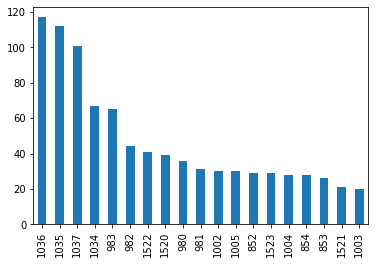

In [64]:
# grafico de barra
df["LojaID"].value_counts(ascending=False).plot.bar()

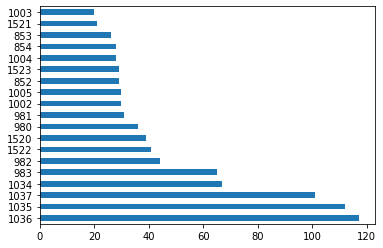

In [65]:
# grafico de barra horizontais
df["LojaID"].value_counts(ascending=False).plot.barh()

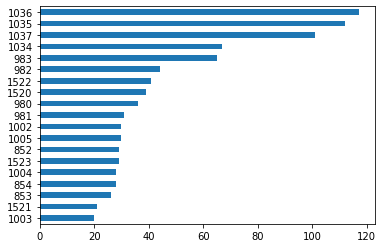

In [66]:
# grafico de barra horizontais
df["LojaID"].value_counts(ascending=True).plot.barh()

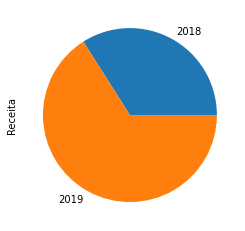

In [68]:
# grafico de Pizza, a soma das receitas por ano
df.groupby(df['Data'].dt.year)["Receita"].sum().plot.pie()


In [69]:
# Total de vendas por cidade
df['Cidade'].value_counts()

Salvador     240
Natal        240
Fortaleza    142
Recife       142
Aracaju      130
Name: Cidade, dtype: int64

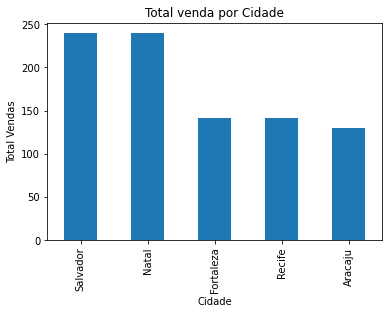

In [71]:
# Adicionando um titutlo e alterando o nome dos eixos
import matplotlib.pyplot as plt

df["Cidade"].value_counts().plot.bar(title="Total venda por Cidade")
plt.xlabel("Cidade")
plt.ylabel("Total Vendas");

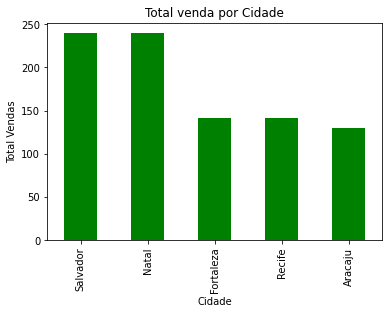

In [72]:
# alterando a cor
df["Cidade"].value_counts().plot.bar(title="Total venda por Cidade",color="green")
plt.xlabel("Cidade")
plt.ylabel("Total Vendas");

In [74]:
# alterando o estilo
plt.style.use("ggplot")

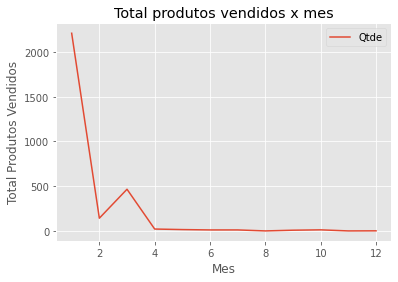

In [77]:
df.groupby(df["mes_venda"])["Qtde"].sum().plot(title = "Total produtos vendidos x mes")
plt.xlabel("Mes")
plt.ylabel("Total Produtos Vendidos")
plt.legend();


In [78]:
df.groupby(df["mes_venda"])["Qtde"].sum()


mes_venda
1     2208
2      144
3      467
4       23
5       17
6       13
7       13
8        2
9       10
10      14
11       2
12       3
Name: Qtde, dtype: int64

In [80]:
# Selecionando apenas as venda de 2019
df_2019 = df[df["Ano_Venda"] == 2019]

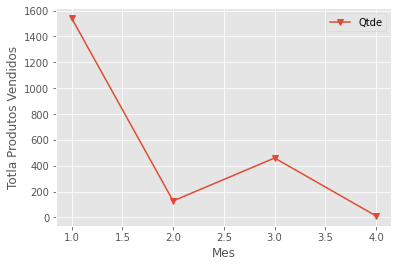

In [83]:
# Total produtos vendidos por mes
df_2019.groupby(df_2019["mes_venda"])["Qtde"].sum().plot(marker="v")
plt.xlabel("Mes")
plt.ylabel("Totla Produtos Vendidos")
plt.legend()

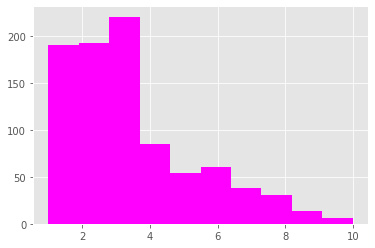

In [85]:
# Histograma
plt.hist(df["Qtde"], color="magenta");

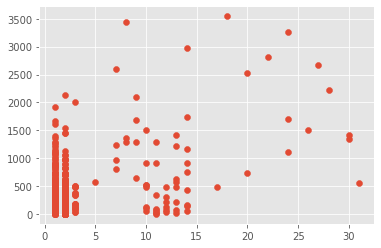

In [88]:
plt.scatter(x=df_2019["dia_venda"], y=df_2019["Receita"]);

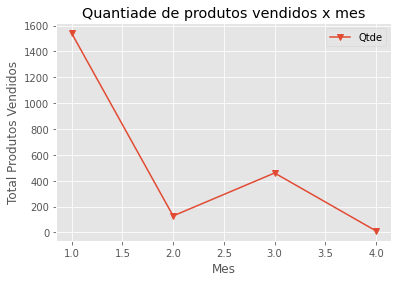

In [90]:
# Salvando em png
df_2019.groupby(df_2019["mes_venda"])["Qtde"].sum().plot(marker='v')
plt.title("Quantiade de produtos vendidos x mes")
plt.xlabel("Mes")
plt.ylabel("Total Produtos Vendidos")
plt.legend()
plt.savefig("grafico QTDE x MEs.png")